# Plot Surfaces

In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

import matplotlib.cm as cm
import matplotlib.mlab as mlab
import mpl_toolkits.mplot3d as plt3
from mpl_toolkits.mplot3d import axes3d

from matplotlib.ticker import LinearLocator, FormatStrFormatter


Following: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [2]:
def plotSurface(surface):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    X, Y, Z = surface()
    
    ## magic to force equal axis scales, from 
    ## https://stackoverflow.com/questions/13685386/matplotlib-equal-unit-length-with-equal-aspect-ratio-z-axis-is-not-equal-to
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, color='r', alpha=0.6
                       ,linewidth=0, antialiased=True)

    # Customize the z axis.
    ## ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    ax.plot_wireframe(X,Y,Z, rstride=3, cstride=3, alpha=0.8)
    # Add a color bar which maps values to colors.
    ##fig.colorbar(surf, shrink=0.5, aspect=5)

    ## ax.view_init(40, 30)
    
    plt.show()

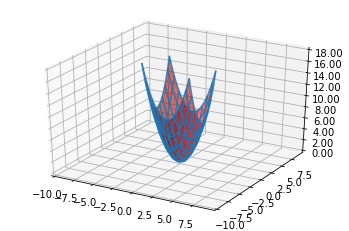

In [3]:
def paraboloid_xy():
    R = 3
    a = 1
    X = np.arange(-R, R, 0.2)
    Y = np.arange(-R, R, 0.2)
    X, Y = np.meshgrid(X, Y)
    Z = a*(X**2 + Y**2)
    return X, Y, Z

plotSurface(paraboloid_xy)

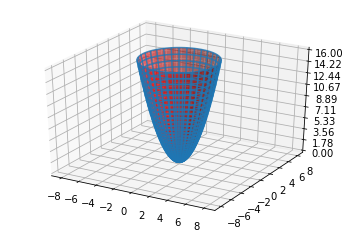

In [4]:
def paraboloid_rhophi():
    R     = 4
    a     = 1
    rho   = np.linspace(0, R, 100)
    phi   = np.linspace(0, 2 * np.pi, 100)
    x = np.outer(rho, np.cos(phi)) ## outer product
    y = np.outer(rho, np.sin(phi))
    z = np.outer(a*rho**2, np.ones(np.size(phi)))
    return x, y, z

plotSurface(paraboloid_rhophi)

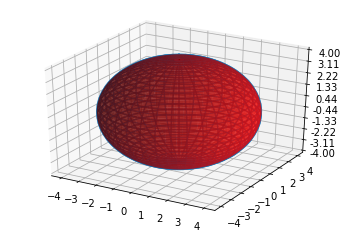

In [5]:
def sphere():
    R=4
    theta = np.linspace(0, np.pi, 100)
    phi   = np.linspace(0, 2 * np.pi, 100)
    x = R * np.outer(np.sin(theta), np.cos(phi)) ## outer product
    y = R * np.outer(np.sin(theta), np.sin(phi))
    z = R * np.outer(np.cos(theta), np.ones(np.size(phi)))
    return x, y, z

plotSurface(sphere)

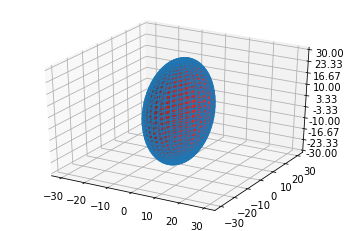

In [6]:
def ellipsoid():
    theta = np.linspace(0, np.pi, 100)
    phi   = np.linspace(0, 2 * np.pi, 100)
    x = 10 * np.outer(np.sin(theta), np.cos(phi)) ## outer product
    y = 20 * np.outer(np.sin(theta), np.sin(phi))
    z = 30 * np.outer(np.cos(theta), np.ones(np.size(phi)))
    return x, y, z

plotSurface(ellipsoid)

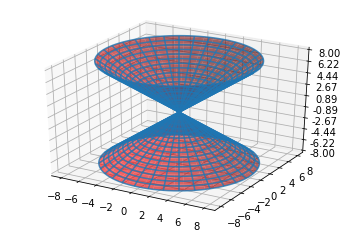

In [7]:
def cone_phiz():
    h     = 4
    a     = 2
    z     = np.linspace(-h, h, 100)
    phi   = np.linspace(0, 2 * np.pi, 100)
    x = np.outer(a*z, np.cos(phi)) ## outer product
    y = np.outer(a*z, np.sin(phi))
    z = np.outer(a*z, np.ones(np.size(phi)))
    return x, y, z

plotSurface(cone_phiz)

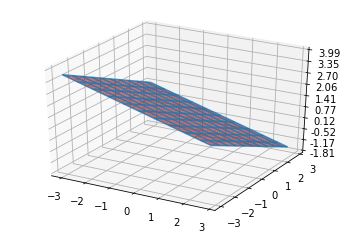

In [8]:
def flat_xy():
    a=2.5
    b=2
    c=1
    X = np.arange(-3, 3, 0.2)
    Y = np.arange(-3, 3, 0.2)
    X, Y = np.meshgrid(X, Y)
    Z = c*(1 - X/a - Y/b)
    return X, Y, Z

plotSurface(flat_xy)